### 1. Problem Statement - Loan Risk Classification using Decision Tree

The goal of this problem is to predict if a loan credit would be a risk to the bank or not?  The dataset used is the German Credit Risk dataset. In simple terms, if the loan amount is given to the applicant, will they pay back or become a defaulter?

We will use Decision tree to create a Predictive model which can tell whether to approve a loan application or not?

- Target Variable: GoodCredit

    - GoodCredit=1 means the loan was a good decision.

    - GoodCredit=0 means the loan was a bad decision.
    
- Predictors: duration, history, purpose, amount, savings etc.

### 2. What is Decision Tree

A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes.

A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.

We make some assumptions while implementing the Decision-Tree algorithm. These are listed below:-
- At the beginning, the whole training set is considered as the root.
- Feature values need to be categorical. If the values are continuous then they are discretized prior to building the model.
- Records are distributed recursively on the basis of attribute values.
- Order to placing attributes as root or internal node of the tree is done by using some statistical approach.

#### 2.1. What is Classification and Regression Trees (CART)?

Decision Tree algorithm is known by its modern name CART which stands for Classification and Regression Trees. Classification and Regression Trees or CART is a term introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification and regression modeling problems.

The CART algorithm provides a foundation for other important algorithms like bagged decision trees, random forest and boosted decision trees. In this kernel, I will solve a classification problem. So, I will refer the algorithm also as Decision Tree Classification problem.

#### 2.2.Terminologies used 

In a Decision Tree algorithm, there is a tree like structure in which each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label. The paths from the root node to leaf node represent classification rules.

We can see that there is some terminology involved in Decision Tree algorithm. The terms involved in Decision Tree algorithm are as follows:-

- Root Node:
  It represents the entire population or sample. This further gets divided into two or more homogeneous sets.
- Splitting:
  It is a process of dividing a node into two or more sub-nodes.
- Decision Node:
  When a sub-node splits into further sub-nodes, then it is called a decision node.
- Leaf/Terminal Node:
  Nodes that do not split are called Leaf or Terminal nodes.
- Pruning:
  When we remove sub-nodes of a decision node, this process is called pruning. It is the opposite process of splitting.
- Branch/Sub-Tree:
  A sub-section of an entire tree is called a branch or sub-tree.
- Parent and Child Node:
  A node, which is divided into sub-nodes is called the parent node of sub-nodes where sub-nodes are the children of a parent    node.


#### 2.3.How Decision Tree algorithm works?

The Decision-Tree algorithm is one of the most frequently and widely used supervised machine learning algorithms that can be used for both classification and regression tasks. It works as below:


- For each attribute in the dataset, the Decision-Tree algorithm forms a node. The most important attribute is placed at the root node.

- For evaluating the task in hand, we start at the root node and we work our way down the tree by following the corresponding node that meets our condition or decision.

- This process continues until a leaf node is reached. It contains the prediction or the outcome of the Decision Tree.

#### 2.4.How are attributes selected?

The primary challenge in the Decision Tree implementation is to identify the attributes which we consider as the root node and each level. This process is known as the attributes selection. There are different attributes selection measure to identify the attribute which can be considered as the root node at each level.

There are 2 popular attribute selection measures. They are as follows:-
- Information gain
- Gini index

While using Information gain as a criterion, we assume attributes to be categorical and for Gini index attributes are assumed to be continuous. These attribute selection measures are described below.

#### 2.4.a Information Gain - Entropy

By using information gain as a criterion, we try to estimate the information contained by each attribute. To understand the concept of Information Gain, we need to know another concept called Entropy.

Entropy
Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or uncertainty of a random variable X. In information theory, it refers to the impurity in a group of examples. Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.

The ID3 (Iterative Dichotomiser) Decision Tree algorithm uses entropy to calculate information gain. So, by calculating decrease in entropy measure of each attribute we can calculate their information gain. The attribute with the highest information gain is chosen as the splitting attribute at the node.

#### 2.4.b. Gini Index

Another attribute selection measure that CART (Categorical and Regression Trees) uses is the Gini index. It uses the Gini method to create split points. Gini index says, if we randomly select two items from a population, they must be of the same class and probability for this is 1 if the population is pure.  It works with the categorical target variable “Success” or “Failure”. It performs only binary splits. The higher the value of Gini, higher the homogeneity. CART (Classification and Regression Tree) uses the Gini method to create binary splits.

Steps to Calculate Gini for a split:
- Calculate Gini for sub-nodes, using formula sum of the square of probability for success and failure (p^2+q^2).
- Calculate Gini for split using weighted Gini score of each node of that split.

In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point. The attribute with minimum Gini index is chosen as the splitting attribute.

#### 2.5.Handle Overfitting 

Overfitting is a practical problem while building a Decision-Tree model. The problem of overfitting is considered when the algorithm continues to go deeper and deeper to reduce the training-set error but results with an increased test-set error. So, accuracy of prediction for our model goes down. It generally happens when we build many branches due to outliers and irregularities in data.

Two approaches which can be used to avoid overfitting are as follows:-

- Pre-Pruning
  In pre-pruning, we stop the tree construction a bit early. We prefer not to split a node if its goodness measure is below a     threshold value. But it is difficult to choose an appropriate stopping point.
- Post-Pruning
  In post-pruning, we go deeper and deeper in the tree to build a complete tree. If the tree shows the overfitting problem then   pruning is done as a post-pruning step. We use the cross-validation data to check the effect of our pruning. Using cross-       validation data, we test whether expanding a node will result in improve or not. If it shows an improvement, then we can         continue by expanding that node. But if it shows a reduction in accuracy then it should not be expanded. So, the node should     be converted to a leaf node.

### 3. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import time as tm
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import ShuffleSplit,train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
#adjusting the display to fit rows and columns effectively
start_time = tm.time()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### 4. Load the data

In [3]:
data = pd.read_csv("CreditRiskData.csv")
data.head(3)

,GoodCredit,checkingstatus,duration,history,purpose,amount,savings,employ,installment,status,others,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201


In [4]:
#check the dimensions of the data'
data.shape

(1000, 21)

In [5]:
#checking for duplicates and deleteing the duplicate records. 
data.drop_duplicates()
data.shape

(1000, 21)

There are no duplicate rows in this data set.

### 5. Exploratory Data Analysis

In [6]:
#checking the fields and their datatypes
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GoodCredit      1000 non-null   int64 
 1   checkingstatus  1000 non-null   object
 2   duration        1000 non-null   int64 
 3   history         1000 non-null   object
 4   purpose         1000 non-null   object
 5   amount          1000 non-null   int64 
 6   savings         1000 non-null   object
 7   employ          1000 non-null   object
 8   installment     1000 non-null   int64 
 9   status          1000 non-null   object
 10  others          1000 non-null   object
 11  residence       1000 non-null   int64 
 12  property        1000 non-null   object
 13  age             1000 non-null   int64 
 14  otherplans      1000 non-null   object
 15  housing         1000 non-null   object
 16  cards           1000 non-null   int64 
 17  job             1000 non-null   object
 18  liable   

All the 13 predictors, that are object type are categorical and rest all are numeric.

In [7]:
#check statistical information abut numerical fields.
data.describe()

,GoodCredit,duration,amount,installment,residence,age,cards,liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [8]:
#observing the summarized information of data
#data types, Missing values based on number of non-null values Vs total rows etc.
#remove those variables from data which have too many missing values (Missing Values > 30%)
#remove Qualitative variables which cannot be used in Machine Learning
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GoodCredit      1000 non-null   int64 
 1   checkingstatus  1000 non-null   object
 2   duration        1000 non-null   int64 
 3   history         1000 non-null   object
 4   purpose         1000 non-null   object
 5   amount          1000 non-null   int64 
 6   savings         1000 non-null   object
 7   employ          1000 non-null   object
 8   installment     1000 non-null   int64 
 9   status          1000 non-null   object
 10  others          1000 non-null   object
 11  residence       1000 non-null   int64 
 12  property        1000 non-null   object
 13  age             1000 non-null   int64 
 14  otherplans      1000 non-null   object
 15  housing         1000 non-null   object
 16  cards           1000 non-null   int64 
 17  job             1000 non-null   object
 18  liable   

In [9]:
#finging unique values for each column
#to understand which column is categorical and which one is Continuous
#typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
data.nunique()

GoodCredit          2
checkingstatus      4
duration           33
history             5
purpose            10
amount            921
savings             5
employ              5
installment         4
status              4
others              3
residence           4
property            4
age                53
otherplans          3
housing             3
cards               4
job                 4
liable              2
tele                2
foreign             2
dtype: int64

Since the variables-installment, residence,cards, liable have < 20 unique values, should be considered catgeorical, inspite of being numeric.

#### Check multicollinearity

In [10]:
#check the correlation matrix
data.corr()

,GoodCredit,duration,amount,installment,residence,age,cards,liable
GoodCredit,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015
duration,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834
amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142
installment,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207
residence,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201
cards,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667
liable,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000


<AxesSubplot:>

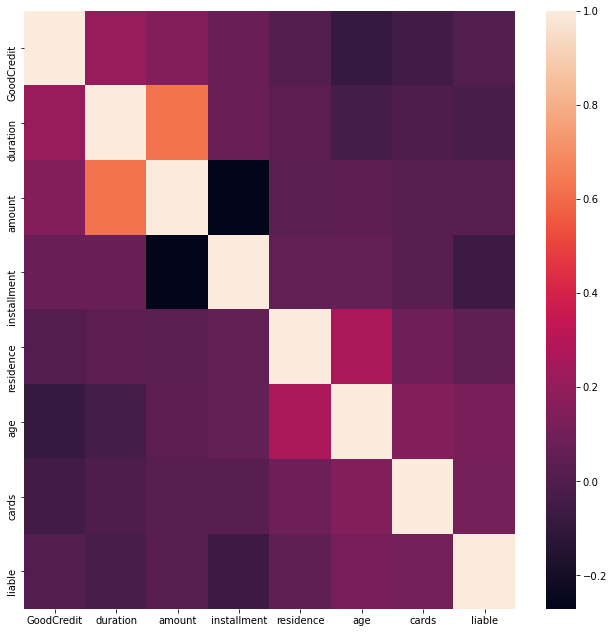

In [11]:
#plot the correlation matrix
plt.figure(figsize=(11,11))
sns.heatmap(data.corr())

#### Separate numerical and categorial columns

In [12]:
#fetch the numerical columns
data_copya = data.copy()
data_copya = data_copya.drop(['installment', 'residence','cards', 'liable', 'duration'],axis=1)
numeric_cols = data_copya.select_dtypes(include=['float64','float32','int64','int32']).columns
numeric_cols

Index(['GoodCredit', 'amount', 'age'], dtype='object')

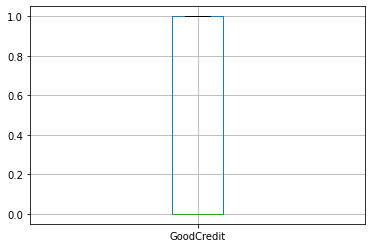

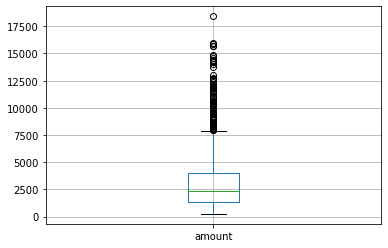

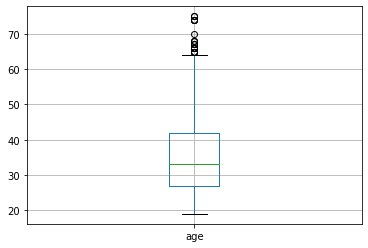

In [13]:
#plot comparative boxplots for the numerica variables
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

lsn=list(numeric_cols)

for c in lsn:
    plt.figure()
    data.boxplot([c])

There are some outliers in the data - age, amount and duration that we will handle.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'amount'}>],
       [<AxesSubplot:title={'center':'duration'}>, <AxesSubplot:>]],
      dtype=object)

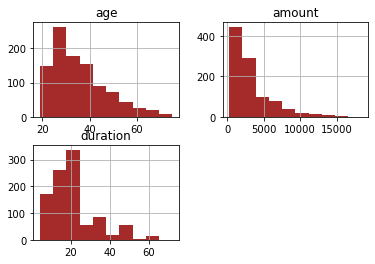

In [14]:
#plotting histograms of multiple columns together
#observe that ApplicantIncome and CoapplicantIncome has outliers
data.hist(['age', 'amount','duration'],color='brown')

All 3 continuous variables show slight skewness to the left, which is acceptable, hence no outlier treatment is required.

In [15]:
#fetch the categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols

Index(['checkingstatus', 'history', 'purpose', 'savings', 'employ', 'status', 'others', 'property', 'otherplans', 'housing', 'job', 'tele', 'foreign'], dtype='object')

In [16]:
new_categorical_cols = list(categorical_cols) + ['installment', 'residence','cards', 'liable']
new_categorical_cols

['checkingstatus',
 'history',
 'purpose',
 'savings',
 'employ',
 'status',
 'others',
 'property',
 'otherplans',
 'housing',
 'job',
 'tele',
 'foreign',
 'installment',
 'residence',
 'cards',
 'liable']

In [17]:
#check unique values in categorical columns
for col in new_categorical_cols:
        print(data[col].value_counts()) 

A14    394
A11    274
A12    269
A13     63
Name: checkingstatus, dtype: int64
A32    530
A34    293
A33     88
A31     49
A30     40
Name: history, dtype: int64
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A410     12
A44      12
A48       9
Name: purpose, dtype: int64
A61    603
A65    183
A62    103
A63     63
A64     48
Name: savings, dtype: int64
A73    339
A75    253
A74    174
A72    172
A71     62
Name: employ, dtype: int64
A93    548
A92    310
A94     92
A91     50
Name: status, dtype: int64
A101    907
A103     52
A102     41
Name: others, dtype: int64
A123    332
A121    282
A122    232
A124    154
Name: property, dtype: int64
A143    814
A141    139
A142     47
Name: otherplans, dtype: int64
A152    713
A151    179
A153    108
Name: housing, dtype: int64
A173    630
A172    200
A174    148
A171     22
Name: job, dtype: int64
A191    596
A192    404
Name: tele, dtype: int64
A201    963
A202     37
Name: foreign, dtype: int64
4    476
2

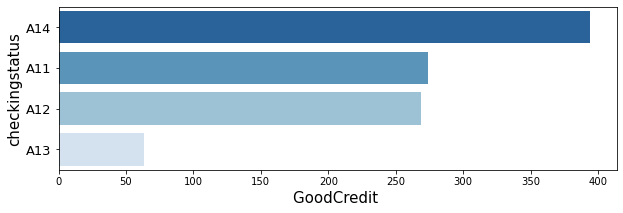

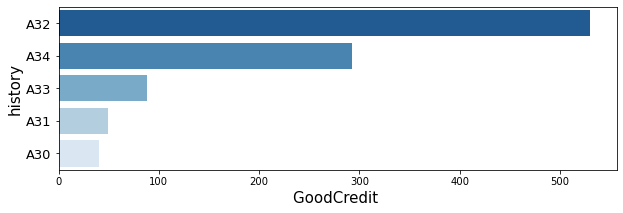

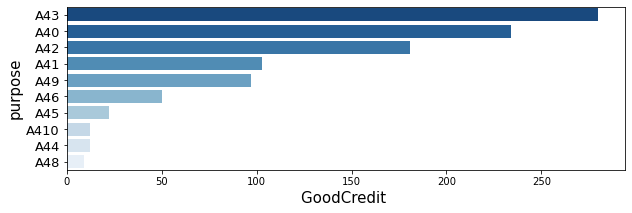

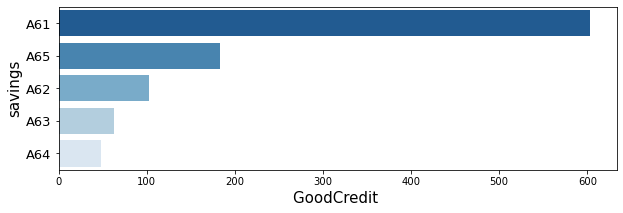

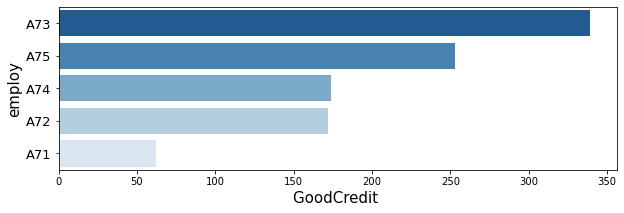

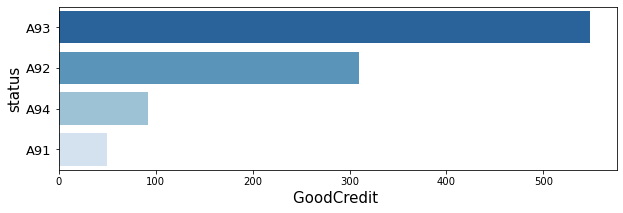

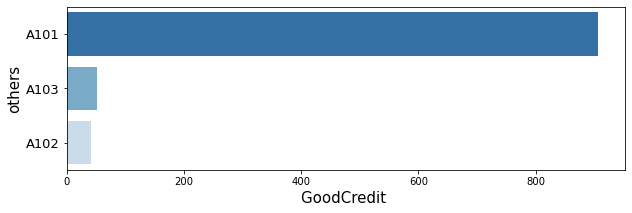

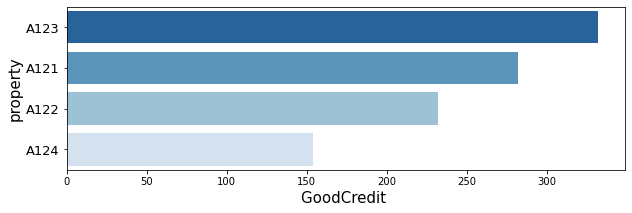

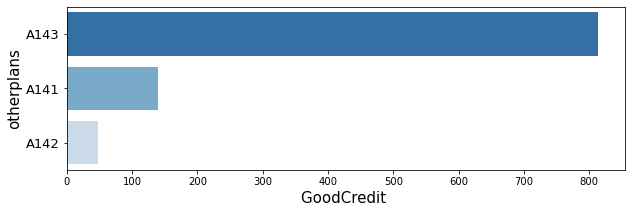

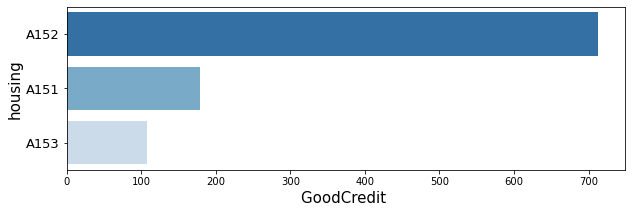

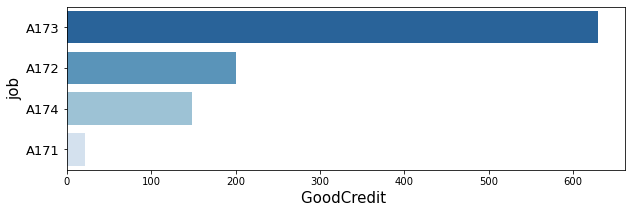

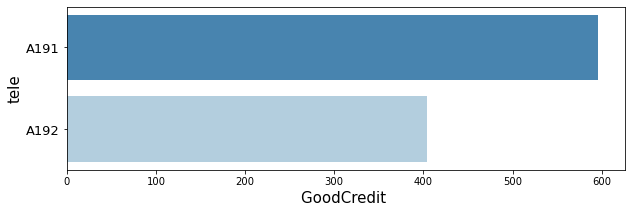

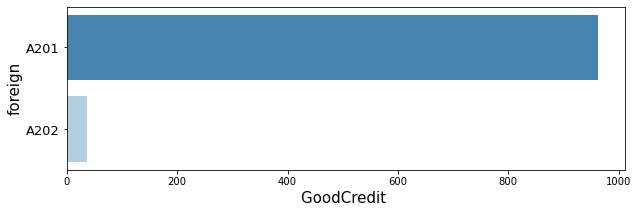

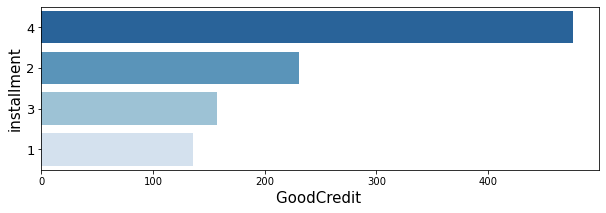

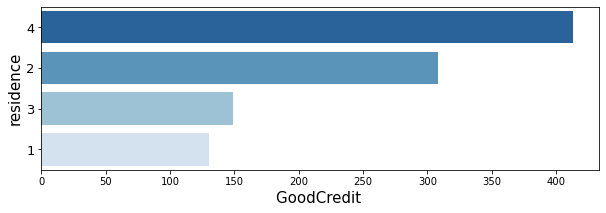

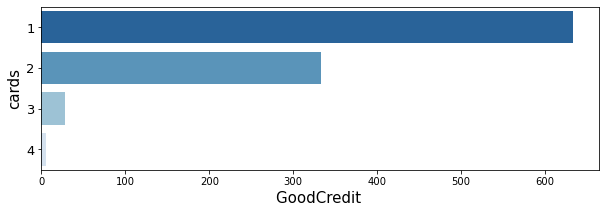

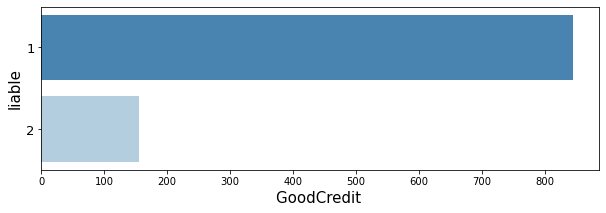

In [18]:
#plot comparative countplots for the categorical variables
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

for i in new_categorical_cols:
  fig, ax = plt.subplots(1,1, figsize=(10, 3))
  sns.countplot(y = data[i],data=data, order=data[i].value_counts().index, palette='Blues_r')
  plt.xlabel('GoodCredit ', fontsize=15)
  plt.ylabel(i,fontsize=15)
  plt.yticks(fontsize=13)


Each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

#### Check data balanced or not

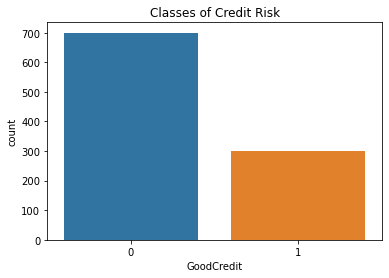

In [19]:
sns.countplot(x='GoodCredit', data=data)
plt.title('Classes of Credit Risk')
plt.show()

The data is imbalanced, we need to handle this.

#### Check missing values

In [20]:
data.isnull().sum()

GoodCredit        0
checkingstatus    0
duration          0
history           0
purpose           0
amount            0
savings           0
employ            0
installment       0
status            0
others            0
residence         0
property          0
age               0
otherplans        0
housing           0
cards             0
job               0
liable            0
tele              0
foreign           0
dtype: int64

In [21]:
#% of values missing in each column
values_list = list()
cols_list = list()
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)
pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = values_list

pct_missing_df

,col,pct_missing
0,GoodCredit,0.0
1,checkingstatus,0.0
2,duration,0.0
3,history,0.0
4,purpose,0.0
5,amount,0.0
6,savings,0.0
7,employ,0.0
8,installment,0.0
9,status,0.0


There are no missing values. We have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

#### Feature Engineering

It is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.

In [22]:
data[new_categorical_cols]

,checkingstatus,history,purpose,savings,employ,status,others,property,otherplans,housing,job,tele,foreign,installment,residence,cards,liable
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201,4,4,2,1
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201,2,2,1,1
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201,2,3,1,2
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201,2,4,1,2
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201,3,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,A32,A42,A61,A74,A92,A101,A121,A143,A152,A172,A191,A201,3,4,1,1
996,A11,A32,A41,A61,A73,A91,A101,A122,A143,A152,A174,A192,A201,4,4,1,1
997,A14,A32,A43,A61,A75,A93,A101,A123,A143,A152,A173,A191,A201,4,4,1,1
998,A11,A32,A43,A61,A73,A93,A101,A124,A143,A153,A173,A192,A201,4,4,1,1


Since all the columns are nominal type- ie no specific order or type, we use OneHotEncoding. For binary categorical variables, we use LabelEncoding.

In [23]:
dummy_df = pd.get_dummies(data[new_categorical_cols], dummy_na=False, drop_first=True)

In [24]:

all_cols=list(data.columns)
all_cols

['GoodCredit',
 'checkingstatus',
 'duration',
 'history',
 'purpose',
 'amount',
 'savings',
 'employ',
 'installment',
 'status',
 'others',
 'residence',
 'property',
 'age',
 'otherplans',
 'housing',
 'cards',
 'job',
 'liable',
 'tele',
 'foreign']

In [25]:
data_copy=data
data_copy.drop(categorical_cols, axis=1,inplace=True)

In [26]:
for c in categorical_cols:
    all_cols.remove(c)
    
all_cols

['GoodCredit',
 'duration',
 'amount',
 'installment',
 'residence',
 'age',
 'cards',
 'liable']

In [27]:
data = pd.concat([data_copy[all_cols], dummy_df], axis=1)
data

,GoodCredit,duration,amount,installment,residence,age,cards,liable,installment,residence,cards,liable,checkingstatus_A12,checkingstatus_A13,checkingstatus_A14,history_A31,history_A32,history_A33,history_A34,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A62,savings_A63,savings_A64,savings_A65,employ_A72,employ_A73,employ_A74,employ_A75,status_A92,status_A93,status_A94,others_A102,others_A103,property_A122,property_A123,property_A124,otherplans_A142,otherplans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,tele_A192,foreign_A202
0,0,6,1169,4,4,67,2,1,4,4,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
1,1,48,5951,2,2,22,1,1,2,2,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,0,12,2096,2,3,49,1,2,2,3,1,2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
3,0,42,7882,2,4,45,1,2,2,4,1,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0
4,1,24,4870,3,4,53,2,2,3,4,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,1736,3,4,31,1,1,3,4,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
996,0,30,3857,4,4,40,1,1,4,4,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0
997,0,12,804,4,4,38,1,1,4,4,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0
998,1,45,1845,4,4,23,1,1,4,4,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0


In [28]:
import gc
del dummy_df
gc.collect()

44875

####  Outlier Handling

Outliers will have a negligible effect because the nodes are determined based on the sample proportions in each split region (and not on their absolute values). In other words, decision trees are are robust to outliers.

#### Feature Scaling

Decision trees do not require feature scaling to be performed as they are not sensitive to the the variance in the data.

### 6.Declare feature vector and target variable

In [29]:
X = data.drop(['GoodCredit'], axis=1)
y = data['GoodCredit']

### 7.Split data into separate training and test set 

In [30]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [31]:
# check the shape of X_train and X_test

print(X_train.shape, X_test.shape)

(700, 52) (300, 52)


### 8.Model Building

#### 8.a. Decision Tree Classifier with criterion gini index 

In [32]:
#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#instantiate the DecisionTreeClassifier model with criterion gini index
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

#\fit the model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [33]:
#predict the Test set results with criterion gini index
y_pred_test = model.predict(X_test)

Here, y_test are the true class labels and y_pred_test are the predicted class labels in the test-set, using gini index as the criterion.

In [34]:
#check test accuracy score
accuracy_score(y_test, y_pred_test)

0.7266666666666667

In [35]:
#check train accuracy score
y_pred_train = model.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.7471428571428571

Here, the training-set accuracy score is 74.71 while .the test-set accuracy to be 72.67. These two values are quite comparable. So, there is no sign of overfitting.

#### Visualize decision-tree

[Text(334.8, 380.52, 'X[13] <= 0.5\ngini = 0.419\nsamples = 700\nvalue = [491, 209]'),
 Text(167.4, 271.8, 'X[0] <= 33.0\ngini = 0.484\nsamples = 425\nvalue = [251, 174]'),
 Text(83.7, 163.07999999999998, 'X[1] <= 10975.5\ngini = 0.458\nsamples = 343\nvalue = [221, 122]'),
 Text(41.85, 54.360000000000014, 'gini = 0.451\nsamples = 337\nvalue = [221, 116]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(251.10000000000002, 163.07999999999998, 'X[30] <= 0.5\ngini = 0.464\nsamples = 82\nvalue = [30, 52]'),
 Text(209.25, 54.360000000000014, 'gini = 0.431\nsamples = 70\nvalue = [22, 48]'),
 Text(292.95, 54.360000000000014, 'gini = 0.444\nsamples = 12\nvalue = [8, 4]'),
 Text(502.20000000000005, 271.8, 'X[44] <= 0.5\ngini = 0.222\nsamples = 275\nvalue = [240, 35]'),
 Text(418.5, 163.07999999999998, 'X[21] <= 0.5\ngini = 0.423\nsamples = 46\nvalue = [32, 14]'),
 Text(376.65000000000003, 54.360000000000014, 'gini = 0.482\nsamples = 32\nvalue = [

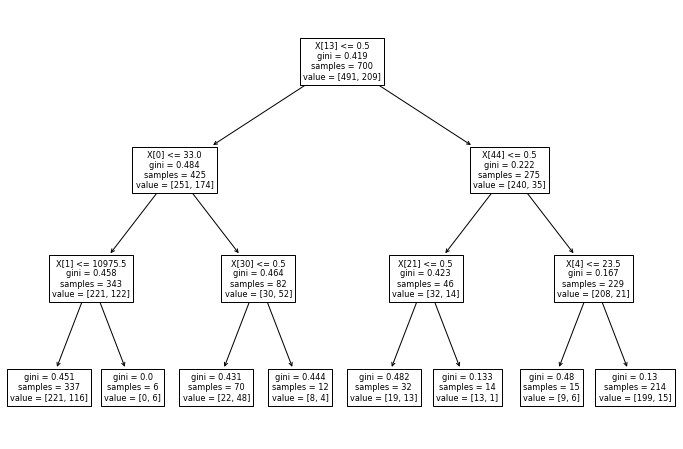

In [36]:
plt.figure(figsize=(12,8))

tree.plot_tree(model.fit(X_train, y_train)) 

In [37]:
#print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm_model = confusion_matrix(y_test, y_pred_test)
cm_model

array([[198,  11],
       [ 71,  20]], dtype=int64)

In [38]:
#print a classification report 
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       209
           1       0.65      0.22      0.33        91

    accuracy                           0.73       300
   macro avg       0.69      0.58      0.58       300
weighted avg       0.71      0.73      0.68       300



#### 8.b. Decision Tree Classifier with criterion entropy

In [39]:
#instantiate the DecisionTreeClassifier model with criterion entropy
model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

#fit the model
model2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [40]:
#predict the Test set results with criterion entropy
y_pred_model2_test = model2.predict(X_test)

In [41]:
#check test accuracy score 
accuracy_score(y_test, y_pred_model2_test)

0.7166666666666667

In [42]:
#check train accuracy score
y_pred_model2_train = model2.predict(X_train)
accuracy_score(y_train, y_pred_model2_train)

0.7414285714285714

We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 74.14% while the test-set accuracy to be 71.67. These two values are quite comparable. So, there is no sign of overfitting.

[Text(334.8, 380.52, 'X[13] <= 0.5\nentropy = 0.88\nsamples = 700\nvalue = [491, 209]'),
 Text(167.4, 271.8, 'X[0] <= 33.0\nentropy = 0.976\nsamples = 425\nvalue = [251, 174]'),
 Text(83.7, 163.07999999999998, 'X[1] <= 10975.5\nentropy = 0.939\nsamples = 343\nvalue = [221, 122]'),
 Text(41.85, 54.360000000000014, 'entropy = 0.929\nsamples = 337\nvalue = [221, 116]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(251.10000000000002, 163.07999999999998, 'X[34] <= 0.5\nentropy = 0.947\nsamples = 82\nvalue = [30, 52]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.983\nsamples = 66\nvalue = [28, 38]'),
 Text(292.95, 54.360000000000014, 'entropy = 0.544\nsamples = 16\nvalue = [2, 14]'),
 Text(502.20000000000005, 271.8, 'X[44] <= 0.5\nentropy = 0.55\nsamples = 275\nvalue = [240, 35]'),
 Text(418.5, 163.07999999999998, 'X[21] <= 0.5\nentropy = 0.887\nsamples = 46\nvalue = [32, 14]'),
 Text(376.65000000000003, 54.360000000000014, 'entropy 

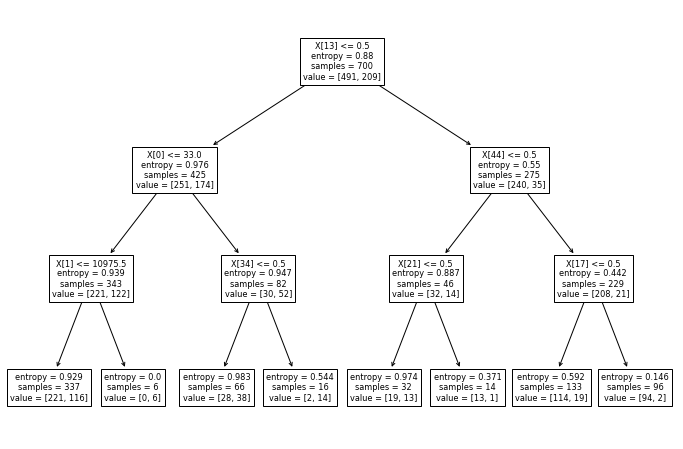

In [43]:
#visualize decision-tree
plt.figure(figsize=(12,8))
tree.plot_tree(model2.fit(X_train, y_train))

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

#### Confusion matrix

In [44]:
#print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm_model2 = confusion_matrix(y_test, y_pred_model2_test)
cm_model2

array([[195,  14],
       [ 71,  20]], dtype=int64)

In [45]:
#print a classification report 
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_model2_test))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82       209
           1       0.59      0.22      0.32        91

    accuracy                           0.72       300
   macro avg       0.66      0.58      0.57       300
weighted avg       0.69      0.72      0.67       300



### Hyper-parameter tuning

In [46]:
dt = DecisionTreeClassifier(random_state=42)

#### from sklearn.model_selection import GridSearchCV

In [47]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [48]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [49]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [50]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006732,0.000432,0.003990,2.598106e-07,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.725714,0.634286,0.725714,0.737143,0.705714,0.041502,22
1,0.008228,0.001635,0.003989,7.053698e-04,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.725714,0.634286,0.742857,0.737143,0.710000,0.044147,14
2,0.007479,0.000497,0.003491,4.985333e-04,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.725714,0.634286,0.742857,0.737143,0.710000,0.044147,14
3,0.006234,0.000827,0.003494,5.026118e-04,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.725714,0.634286,0.742857,0.737143,0.710000,0.044147,14
4,0.006728,0.001298,0.003741,4.328169e-04,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.737143,0.634286,0.748571,0.754286,0.718571,0.049052,1


In [51]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
4,0.006728,0.001298,0.003741,0.000433,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.737143,0.634286,0.748571,0.754286,0.718571,0.049052,1
9,0.004737,0.002159,0.003515,0.003385,gini,3,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.737143,0.634286,0.748571,0.754286,0.718571,0.049052,1
14,0.001011,0.001011,0.008550,0.000874,gini,5,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.737143,0.634286,0.748571,0.754286,0.718571,0.049052,1
19,0.006030,0.004014,0.000000,0.000000,gini,10,100,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.737143,0.634286,0.748571,0.754286,0.718571,0.049052,1
24,0.004525,0.003586,0.003016,0.003006,gini,20,100,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.737143,0.634286,0.748571,0.754286,0.718571,0.049052,1


In [59]:
dt_best =grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=2, min_samples_leaf=100, random_state=42)

In [60]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 100}

In [58]:
y_pred_best_train = dt_best.predict(X_train)
accuracy_score(y_train, y_pred_best_train)

0.7185714285714285

In [53]:
y_pred_best_test = dt_best.predict(X_test)
accuracy_score(y_test, y_pred_best_test)

0.72

In [55]:
print(classification_report(y_test,y_pred_best_test))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       209
           1       0.55      0.43      0.48        91

    accuracy                           0.72       300
   macro avg       0.66      0.64      0.64       300
weighted avg       0.71      0.72      0.71       300



In [56]:
cm_best = confusion_matrix(y_test, y_pred_best_test)
print(cm_best)

[[177  32]
 [ 52  39]]


[Text(334.8, 362.4, 'X[13] <= 0.5\ngini = 0.419\nsamples = 700\nvalue = [491, 209]'),
 Text(167.4, 217.44, 'X[0] <= 22.5\ngini = 0.484\nsamples = 425\nvalue = [251, 174]'),
 Text(83.7, 72.47999999999996, 'gini = 0.431\nsamples = 239\nvalue = [164, 75]'),
 Text(251.10000000000002, 72.47999999999996, 'gini = 0.498\nsamples = 186\nvalue = [87, 99]'),
 Text(502.20000000000005, 217.44, 'X[17] <= 0.5\ngini = 0.222\nsamples = 275\nvalue = [240, 35]'),
 Text(418.5, 72.47999999999996, 'gini = 0.282\nsamples = 165\nvalue = [137, 28]'),
 Text(585.9, 72.47999999999996, 'gini = 0.119\nsamples = 110\nvalue = [103, 7]')]

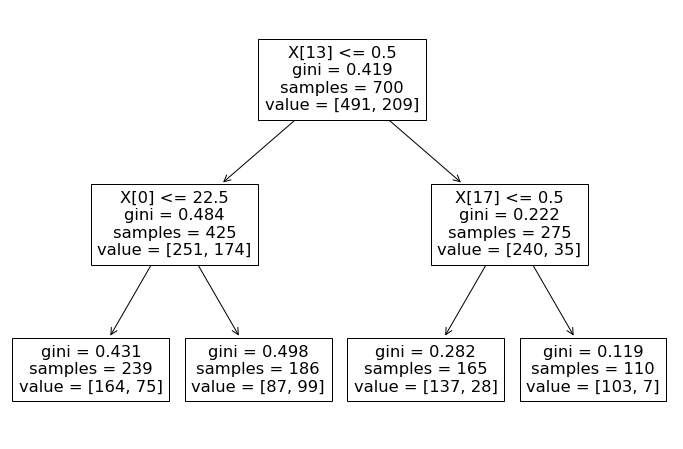

In [57]:
#visualize decision-trees
plt.figure(figsize=(12,8))
tree.plot_tree(dt_best.fit(X_train, y_train))


### Conclusion

We have built a base decision tree with training accuracy of 71.6% and test accuracy of 74.7%.

After hyper-tuning, we have found the best parameters to be {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 100}.

And the resulting tuned model gave us a training accuracy of 71.85% and testing accuracy of 72%. 